In [ ]:
# HOUSE PREDICTION PROJECT - BOSTON HOUSE PRICES dataset

In [43]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # to split features into Training and Test
from xgboost import XGBRegressor # importing the XGBoost Regressor Algorithm
from sklearn import metrics # this is for model evaluation

In [29]:
# Feed dataset into a pandas Dataframe
boston_df = pd.read_csv('boston_house_prices.csv')
boston_df.head() # Returns the first 5 rows.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [30]:
# The Last column MEDV holds the PRICE of each house that we'll be predicting
# renaming it appropriately will make things alot easy:
boston_df.rename(columns= {'MEDV': 'PRICE'}, inplace=True)
boston_df.head()         # (Check the last column's name; it's been successfully renamed. inplace makes change permanent)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Carry out EDA
# Since this is a Regression problem, inputs/features and output/target/labels.
# We have a total of 14 columns (13 as inputs/features, 1 as output/target)
# we would find the Correlation between features (which of the 13 features are inter-related)

In [31]:
# Check the number of ROWS & COLUMNS we have in this dataframe
boston_df.shape          # (506 Rows/Entries/Data points, 14 Columns)

(506, 14)

In [32]:
# Check Dataset for missing values
boston_df.isnull().sum()      #(No missing Value found i.e. no NaN)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [33]:
# or using info()
boston_df.info()     #(No missing Value found i.e. no NaN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [34]:
# Let's obtain some STATS about this dataframe
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
# Find the CORRELATION between the various features in this Dataframe
# CORRELATION represents the relationship betwen 2 variables.
# +ve correlation - implies that if 1 variable increases, the 2nd variable increases as well.
# -ve correlation - implies that if 1 variable increases, the 2nd variable decreases as well.
correlation = boston_df.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

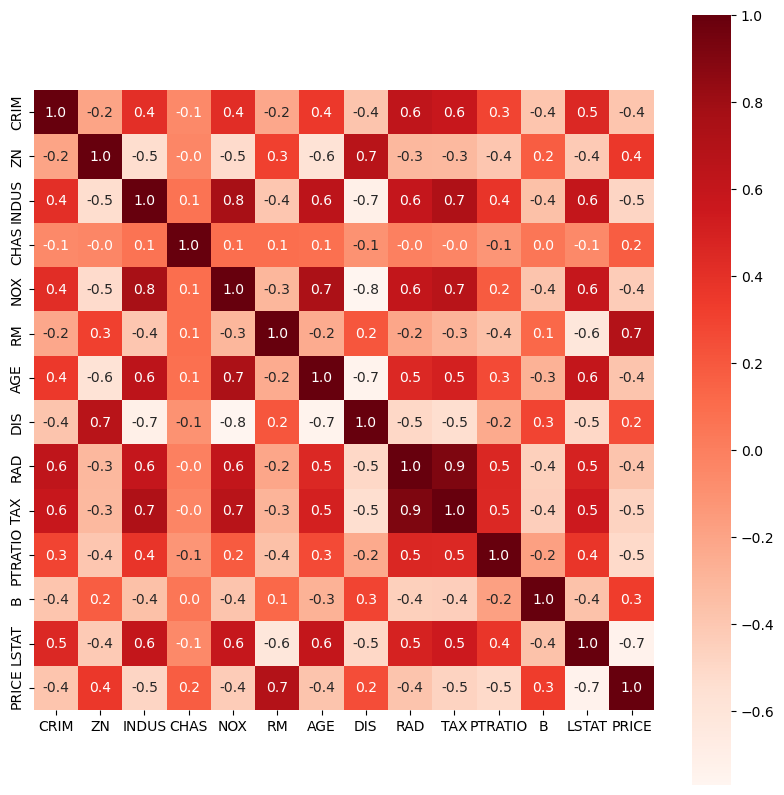

In [52]:
# A HEATMAP will help us further understand this
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size': 10}, cmap='Reds')

In [55]:
# SPLIT the Data into Training and Test
# We need to feed our data (features) and label(target) separately to our Algorithm
# in order for it to find a PATTERN between the PRICE and all other Data
# Which is the ONLY way it can LEARN from the Data.
X = boston_df.drop(columns=['PRICE'])       # X - will hold data in all 1st 13 columns)
Y = boston_df['PRICE']                      # Y - will hold ONLY data of the label (PRICE)

print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [60]:
# Commence the actual Data SPLITTING
# X_train will be given to the model, and understnd patterns with corresponding labels in Y_train
# After training, we then evaluate the preformance of the MODEL, by submitting
# X_train data to see how well it will predict Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [61]:
# display how the dataset has been split
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [62]:
# Feed training Data to XGBoost Regression Algorithm to train our Model
# XGBoost Regressor is a type of Decision Tree Algorithm
# Load the XGBoost model into a variable
XGBModel = XGBRegressor()

In [63]:
# We'll fit(train) the training data (X_train) and corresponding training label (Y_train) into this model
XGBModel.fit(X_train, Y_train)    # Parameters with which our model is trained are listed

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluate our Model (to know how well it has performed) with the help of the testing data
# Accuracy score is used in classification problems, not Regression problems
# For REGRESSION problems, We will therefore FIND the R-squared error and mean absolute errors 
# Before then, we must do a prediction


In [64]:
# Accuracy on Predictions from training data
pred_accuracy_training_data = XGBModel.predict(X_train) #The model will predict house prices and store in the variable
pred_accuracy_training_data #displays predictions (PRICEs for each training datapoint)

array([23.112196 , 20.992601 , 20.10438  , 34.67932  , 13.920501 ,
       13.499354 , 21.998383 , 15.206723 , 10.89543  , 22.67402  ,
       13.795236 ,  5.602332 , 29.808502 , 49.98666  , 34.89634  ,
       20.594336 , 23.388903 , 19.2118   , 32.69294  , 19.604128 ,
       26.978151 ,  8.405952 , 46.00062  , 21.70406  , 27.084402 ,
       19.372278 , 19.297894 , 24.79984  , 22.608278 , 31.707775 ,
       18.53683  ,  8.703393 , 17.40025  , 23.698814 , 13.29729  ,
       10.504759 , 12.693588 , 24.994888 , 19.694864 , 14.911037 ,
       24.20254  , 24.991112 , 14.901547 , 16.987965 , 15.592753 ,
       12.704759 , 24.505623 , 15.007718 , 49.999355 , 17.509344 ,
       21.18844  , 31.999287 , 15.606071 , 22.902134 , 19.309835 ,
       18.697083 , 23.302961 , 37.19767  , 30.102247 , 33.117855 ,
       20.993683 , 50.00471  , 13.40048  ,  5.002565 , 16.50862  ,
        8.4016905, 28.651423 , 19.49218  , 20.595366 , 45.404697 ,
       39.808857 , 33.4055   , 19.81498  , 33.406376 , 25.3020

In [65]:
# Lets compare the above predictions with the ORIGINALS found in Y_train
# This comparison will help extract the prediction error made by our MODEL.
# We will deploy EVALUATION  METRICS: R-squared error & Mean-absolute error

r2_error = metrics.r2_score(Y_train, pred_accuracy_training_data)
# r2_score will find the variance between Y_train and pred_accuracy_training_data

# using the mean absolute error (MAE) to test accuracy
ma_error = metrics.mean_absolute_error(Y_train, pred_accuracy_training_data)
# MAE will get the difference between original value and predicted value then find the mean

In [68]:
# Compare both error values. 
# Values closer to 1 means our model is predicting perfectly.
# Values of 10 means model is NOT performing well.
print('R-squared Error: ', r2_error)
print('Mean Absolute Error: ', ma_error)

R-squared Error:  0.9999980039471451
Mean Absolute Error:  0.0091330346494618


In [ ]:
# The above values mean that our MODEL is performing WONDERFULLY WELL!!!
# However, we could get more accuracy and less errors if we use more data and other MODELS (Algorithms)
# XGBoost was used due to the small size of our dataset.


In [69]:
# Having examined the errors for Training Data, we need to repeat steps for Test data.

# Accuracy on Predictions from test data
pred_accuracy_test_data = XGBModel.predict(X_test) #The model will predict house prices and store in the variable
pred_accuracy_test_data 

array([22.007828 , 21.22598  , 30.466019 , 27.735027 ,  9.134951 ,
       12.740403 , 25.738058 , 27.750889 , 25.364376 , 20.229292 ,
       27.821787 , 24.7761   , 19.771252 , 20.497349 , 12.970438 ,
       22.86288  , 19.605635 , 10.677987 ,  8.277654 , 15.529657 ,
       22.842052 , 20.002996 , 34.06762  , 18.943192 , 15.624948 ,
       18.787666 , 46.0246   , 33.05114  , 34.804283 , 19.070232 ,
       17.53711  , 20.27066  , 31.102339 , 24.026129 , 12.199101 ,
       18.224184 , 10.182956 , 21.252314 , 22.891352 , 21.458113 ,
       26.451164 , 12.1898775, 27.141438 ,  8.322471 , 21.356699 ,
       12.768549 , 35.221687 , 14.574406 , 32.06173  , 15.088605 ,
       31.076805 , 26.808199 ,  6.1558666, 34.42615  , 25.135347 ,
       19.508772 , 19.424906 , 19.58183  , 16.680052 , 22.962534 ,
       20.904106 , 21.24     , 18.46788  , 29.243906 , 33.434864 ,
       26.021257 , 49.91979  , 25.905489 ,  9.713634 , 24.058743 ,
       16.63922  ,  9.0341625, 13.197622 , 18.80479  , 26.9856

In [70]:
# Error scores for Test data
r2_error_test = metrics.r2_score(Y_test, pred_accuracy_test_data)
# r2_score will find the variance between Y_train and pred_accuracy_training_data

# using the mean absolute error (MAE) to test accuracy
ma_error_test = metrics.mean_absolute_error(Y_test, pred_accuracy_test_data)
# MAE will get the difference between original value and predicted value then find the mean

# Compare both error values. 
# Values closer to 1 means our model is predicting perfectly.
# Values of 10 means model is NOT performing well.
print('R-squared Error: ', r2_error_test)
print('Mean Absolute Error: ', ma_error_test)

R-squared Error:  0.9051721149855378
Mean Absolute Error:  2.0748727686264927


In [ ]:
# Our model is performing well.

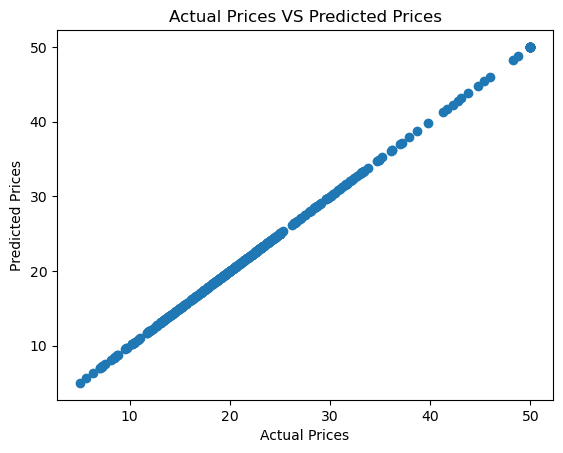

In [71]:
## Create a scatter plot to visualize accuracy in predictions
plt.scatter(Y_train, pred_accuracy_training_data)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices VS Predicted Prices')
plt.show()

In [ ]:
## Our MODEL predictions were actually VERY close to Actual Prices! Hurray!!!